In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\think\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
### To see the current working directory
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\05. AI and DL IITR-15Mar2025(M)'

`os`: to use operating system related functions

- To know the `current working directory`: `os.getcwd()`

- To change the `change directory`: `os.chdir(path)`

In [3]:
# -------------------------------
# 1. Data Generation and Setup
# -------------------------------

In [5]:
def generate_data(n_samples = 100, noise=0.1, seed=42):
    """
    Generate dummy linear data: y = 4 + 3*X + noise.
    """
    np.random.seed(seed)
    X = 2 * np.random.rand(n_samples, 1) #generates random numbers in a given shape
    y = 4 + 3*X + noise * np.random.randn(n_samples, 1)
    return X, y

In [45]:
## Generated data
X, y = generate_data(n_samples=100, noise=0.7)

In [46]:
X.ndim

2

In [47]:
X.shape

(100, 1)

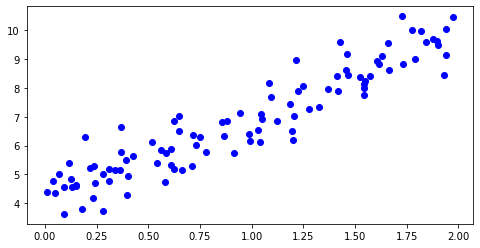

In [48]:
### let us plot the data distribution - WITHOUT NOISE
plt.figure(figsize = (8,4))
plt.scatter(X, y, color = 'blue', label='Generated Data with Noise')
plt.show()

In [ ]:
def generate_data_test(n_samples = 100, noise=0.1, seed=42):
    """
    Generate dummy linear data: y = 4 + 3*X + noise.
    """
    np.random.seed(seed)
    X = 2 * np.random.rand(n_samples, 1) #generates random numbers in a given shape
    y = 4 + 3*X 
    return X, y

In [ ]:
## Generated data
X_test, y_test = generate_data_test(n_samples=100, noise=0.2)

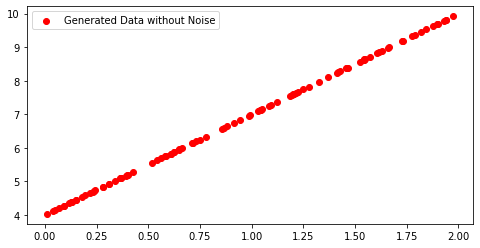

In [40]:
### let us plot the data distribution - WITHOUT NOISE
plt.figure(figsize = (8,4))
plt.scatter(X_test, y_test, color = 'red', label='Generated Data without Noise')
plt.legend()
plt.show()

In [49]:
# Number of rows in data
m = len(y)

### Let us add the bias term
X_b = np.c_[np.ones((m,1)), X]  # adding a bias term which is fixed value 1 to the existing X

In [50]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

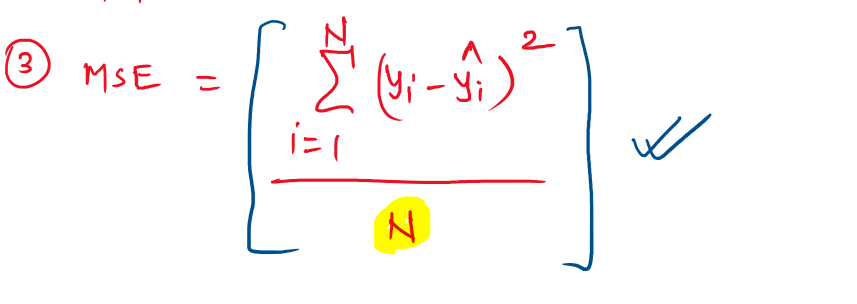

In [51]:
### Define the cost function
def compute_cost(X,y, theta):
    """
    Compute the Mean Squared Error Cost Function
    """
    m = len(y)
    return np.sum((X.dot(theta) - y) ** 2)/(2*m) # in denominator there is an extra 2

### BATCH GRADIENT DESCENT FUNCTION

In [61]:
def bgd(X,y,theta, learning_rate = 0.1, epochs = 1000):
    
    """
    Vanilla Gradient Descent using the entire dataset
    Returns the final theta and a history of the cost function
    X = Array of X with added bias
    y = Vector of y
    theta: vector of weight parameter randomly assigned
    learning_rate: default to 0.1
    epochs: number of times model will run through the entire training dataset
    
    """
    m = len(y)
    cost_history = np.zeros(epochs) # zero-array to store the cost after each update
    theta_history = np.zeros((epochs, theta.shape[0])) #zero-array to store the parameter (weights & biases) values
    
    
    for epoch in range(epochs):
        
        gradients = (X.T.dot(X.dot(theta) - y))/m
        theta = theta - learning_rate * gradients
        cost = compute_cost(X,y, theta)
        
        #Update the empty arrays for theta and cost_history
        cost_history[epoch] = cost #uni-dimension
        theta_history[epoch, :]=theta.T # 2 dimensions
        
    return theta, cost_history, theta_history

### Running the algorithm


In [62]:
### Initialize the parameters 
np.random.seed(0)
### Initialize the theta
theta = np.random.randn(2,1)
print(theta)

[[1.76405235]
 [0.40015721]]


In [95]:
theta_bgd, cost_history_bgd, theta_history_bgd = bgd(X_b, y, theta,  learning_rate = 0.1, epochs=30)

In [96]:
cost_history_bgd

array([7.75001556, 4.95373459, 3.19306184, 2.08444818, 1.38639656,
       0.94685122, 0.6700721 , 0.49577758, 0.38601205, 0.31687719,
       0.2733257 , 0.24588318, 0.22858419, 0.21767263, 0.21078349,
       0.20642765, 0.20366748, 0.2019126 , 0.20079125, 0.20006936,
       0.19959952, 0.19928888, 0.19907899, 0.19893301, 0.19882774,
       0.19874855, 0.19868622, 0.19863492, 0.19859097, 0.19855204])

In [103]:
theta_history_bgd

array([[2.23205069, 0.92571924],
       [2.60382737, 1.3423793 ],
       [2.89924527, 1.67263224],
       [3.13406567, 1.93432758],
       [3.32079521, 2.14162876],
       [3.46935799, 2.30577432],
       [3.58762888, 2.4356819 ],
       [3.68185666, 2.53842754],
       [3.75699987, 2.61962596],
       [3.81699317, 2.6837323 ],
       [3.86495882, 2.73428165],
       [3.90337444, 2.77407896],
       [3.93420612, 2.80534988],
       [3.95901403, 2.82986037],
       [3.97903628, 2.84901161],
       [3.99525539, 2.86391535],
       [4.0084511 , 2.87545369],
       [4.01924222, 2.88432647],
       [4.02811987, 2.89108894],
       [4.03547383, 2.8961816 ],
       [4.04161351, 2.89995391],
       [4.04678448, 2.90268308],
       [4.05118172, 2.90458902],
       [4.05496   , 2.90584612],
       [4.05824224, 2.90659271],
       [4.06112606, 2.90693847],
       [4.06368897, 2.90697035],
       [4.0659926 , 2.90675728],
       [4.0680859 , 2.9063539 ],
       [4.0700078 , 2.90580348]])

In [97]:
print('BGD Theta 0: {:0.3f}, \nBGD Theta 1: {:0.3f}'.format(theta_bgd[0][0], theta_bgd[1][0]))
print('BGD Final Cost Value: {:0.3f}'.format(cost_history_bgd[-1]))

BGD Theta 0: 4.070, 
BGD Theta 1: 2.906
BGD Final Cost Value: 0.199


Text(0.5, 0.5, 'Final Cost: 0.199\nTheta0: 4.070\nTheta1: 2.906')

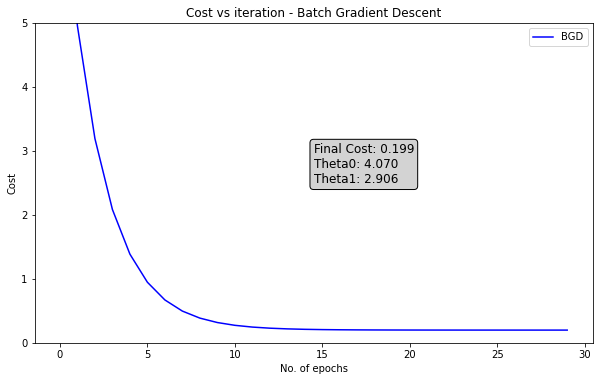

In [98]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(10,20)) #canvas ready

# Plot for BGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_bgd)), cost_history_bgd, label='BGD', color='blue')
plt.title('Cost vs iteration - Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_bgd[-1]:.3f}\nTheta0: {theta_bgd[0][0]:.3f}\nTheta1: {theta_bgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)


In [99]:
### GPT code - Review later

import numpy as np

# Create a small sample dataset
X_sample = np.array([[1, 2],
                     [1, 4],
                     [1, 6]])  # Includes bias term as the first column (1s)

theta_sample = np.array([[0.5],
                         [2.0]])  # theta = [bias, weight]

# Perform the dot product
predictions = X_sample.dot(theta_sample)

X_sample, theta_sample, predictions


(array([[1, 2],
        [1, 4],
        [1, 6]]),
 array([[0.5],
        [2. ]]),
 array([[ 4.5],
        [ 8.5],
        [12.5]]))

In [100]:
X_sample

array([[1, 2],
       [1, 4],
       [1, 6]])

In [101]:
theta_sample

array([[0.5],
       [2. ]])

In [102]:
predictions

array([[ 4.5],
       [ 8.5],
       [12.5]])

### Let us plot the best fit line

### Visualization

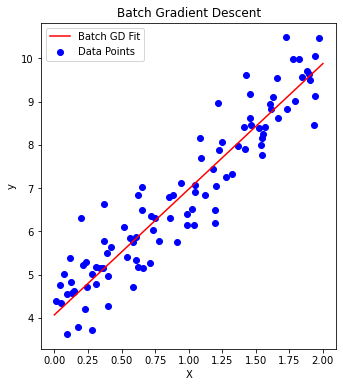

In [109]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='red', label='Batch GD Fit')
plt.title("Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()